In [1]:
import numpy as np
import sys

# Import timer lib. to measure running time
from timeit import default_timer as timer

# Import plot lib. to plot results.
# You may need to install matplotlib by typing "python3 -m pip install -U matplotlib" in the terminal
import matplotlib.pyplot as plt

## Question 1 - Selection Sort

In [2]:
def SelectionSort(A, n):
    for i in range(n-1):
        smallest = i
        for j in range(i+1, n):
            if A[j] < A[smallest]:
                smallest = j
        temp = A[i]
        A[i] = A[smallest]
        A[smallest] = temp
    return A

input_A = [23, 12, 56, -1, 23, 32, 3, 0, 10, 16]
print(SelectionSort(input_A, len(input_A)))

[-1, 0, 3, 10, 12, 16, 23, 23, 32, 56]


## Question 2 - Bubble Sort

#### Question 2-1. Implementation and testing.

In [3]:
def BubbleSort(A, n):
    for i in range(0, n):
        for j in range(n-1, i+1, -1):
            if A[j] < A[j-1]:
                temp = A[j]
                A[j] = A[j-1]
                A[j-1] = temp
    return A

input_A = [23, 12, 56, -1, 23, 32, 3, 0, 10, 16]
print(BubbleSort(input_A, len(input_A)))

[23, -1, 0, 3, 10, 12, 16, 23, 32, 56]


#### Question 2-2. Test using randomly generated input.

In [4]:
rand_input = np.random.randint(-1000, 1000, 1000)

start = timer()
BubbleSort(rand_input, 1000)
end = timer()
print(end-start)

0.13740195799982757


## Question 3 - Insertion Sort

#### Question 3-1. Implementation and test.

In [5]:
def InsertionSort(A, n):
    for i in range(1, n):
        key = A[i]
        j = i-1
        while j >= 0 and key < A[j]:
            A[j+1] = A[j]
            j -= 1
        A[j+1] = key
    return A

input_A = [23, 12, 56, -1, 23, 32, 3, 0, 10, 16]
print(InsertionSort(input_A, len(input_A)))

[-1, 0, 3, 10, 12, 16, 23, 23, 32, 56]


#### Question 3-2. Compare run time with three types of input.

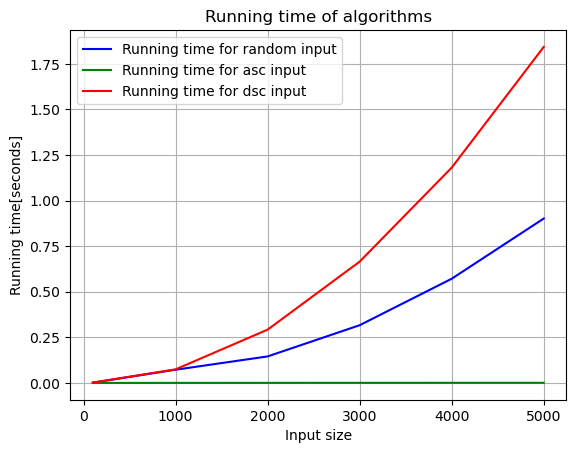

In [6]:
size = [100, 1000, 2000, 3000, 4000, 5000]

random_set, asc_set, dsc_set = [], [], []

elapsed_time_random, elapsed_time_asc, elapsed_time_dsc = [], [], []

for i in range(0, len(size)):
    
    random_set.append(np.random.randint(0, 1000000, size[i]))
    start = timer()
    InsertionSort(random_set[i], len(random_set[i]))
    end = timer()
    elapsed_time_random.append(end-start)
    
    asc_set.append(np.arange(0, size[i]))
    start = timer()
    InsertionSort(asc_set[i], len(asc_set[i]))
    end = timer()
    elapsed_time_asc.append(end-start)
    
    dsc_set.append(np.arange(size[i], 0, -1))
    start = timer()
    InsertionSort(dsc_set[i], len(dsc_set[i]))
    end = timer()
    elapsed_time_dsc.append(end-start)
    
plt.plot(size, elapsed_time_random, color='blue', label='Running time for random input')
plt.plot(size, elapsed_time_asc, color='green', label='Running time for asc input')
plt.plot(size, elapsed_time_dsc, color='red', label='Running time for dsc input')
plt.title("Running time of algorithms")
plt.xlabel("Input size")
plt.ylabel("Running time[seconds]")
plt.grid(True)
plt.legend()
plt.show()

#### Question 3-3. InsertionSort run time analysis.
The random input represents the average time complexity for insertion sort which is $\Theta(n^2)$ because each element needs to be compared to every other element for the array to be sorted. The ascending order input represents the best case scenerio for insertion sort because the elements are already sorted so it runs at $\Theta(n)$ since the time to sort an already-sorted list is proportional to the amount of elements in the list. The descending order input, on the other hand, represents the worst case scenario because it means that every singly element must be sorted in the array by being compared to each other element which is why it the curve on the graph that grows the fastest.

## Question 4 - Merge Sort

#### Question 4-1. Implementation and test.

In [7]:
def merge(A, p, q, r):
    n1 = q - p + 1
    n2 = r - q
    L = [0] * (n1)
    R = [0] * (n2)
    
    for i in range(0, n1):
        L[i] = A[p + i]
    for j in range(0, n2):
        R[j] = A[q + j + 1]
    
    i = 0
    j = 0
    k = p
    while i < n1 and j < n2:
        if L[i] <= R[j]:
            A[k] = L[i]
            i += 1
        else:
            A[k] = R[j]
            j += 1
        k += 1
        
    while i < n1:
        A[k] = L[i]
        i += 1
        k += 1
        
    while j < n2:
        A[k] = R[j]
        j += 1
        k += 1
    
    

def MergeSort(A, p, r):
    if p < r:
        q = p+(r-p)//2
        
        MergeSort(A, p, q)
        MergeSort(A, q+1, r)
        merge(A, p, q, r)
    
    
input_A = [23, 12, 56, -1, 23, 32, 3, 0, 10, 16]
n = len(input_A)
MergeSort(input_A, 0, n-1)
print(input_A)


[-1, 0, 3, 10, 12, 16, 23, 23, 32, 56]


#### Question 4-2. Compare run time with three types of input.

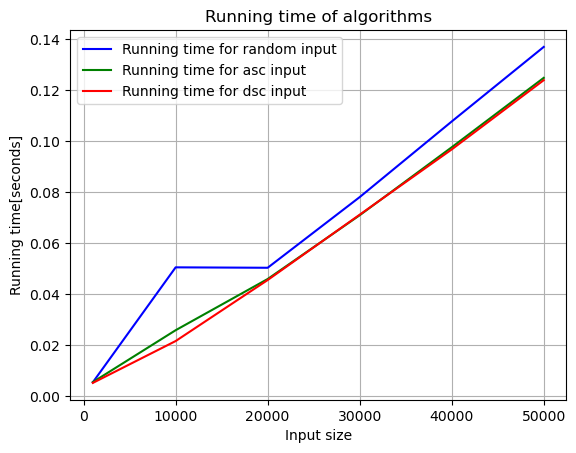

In [8]:
size = [1000, 10000, 20000, 30000, 40000, 50000]

random_set, asc_set, dsc_set = [], [], []

elapsed_time_random, elapsed_time_asc, elapsed_time_dsc = [], [], []

for i in range(0, len(size)):
    
    random_set.append(np.random.randint(0, 1000000, size[i]))
    start = timer()
    MergeSort(random_set[i], 0, len(random_set[i])-1)
    end = timer()
    elapsed_time_random.append(end-start)
    
    asc_set.append(np.arange(0, size[i]))
    start = timer()
    MergeSort(asc_set[i], 0, len(asc_set[i])-1)
    end = timer()
    elapsed_time_asc.append(end-start)
    
    dsc_set.append(np.arange(size[i], 0, -1))
    start = timer()
    MergeSort(dsc_set[i], 0, len(dsc_set[i])-1)
    end = timer()
    elapsed_time_dsc.append(end-start)
    
plt.plot(size, elapsed_time_random, color='blue', label='Running time for random input')
plt.plot(size, elapsed_time_asc, color='green', label='Running time for asc input')
plt.plot(size, elapsed_time_dsc, color='red', label='Running time for dsc input')
plt.title("Running time of algorithms")
plt.xlabel("Input size")
plt.ylabel("Running time[seconds]")
plt.grid(True)
plt.legend()
plt.show()

#### Question 4-4. MergeSort run time analysis.
As seen in the graph, the run time of merge sort increases proportionally to the increasing size of the input and does so in a similar manner for all three types of input, regardless of the position the elements are in array. As such, the run time analysis can be described as being $\Theta(n*logn)$ for all three types of input, being random element input, ascending order input, and descending order input. Compared to the run time of insertion sort, merge sort is much faster on average and therefore is more reliable regardless of the input size or type. However, merge sort is not in place and does require auxiliary space.